In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# Export df
df_final_demo = pd.read_csv('df_final_demo.txt')
df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')

In [265]:
df_final_demo.sort_values(by='client_id').head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
59771,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0
40126,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1532,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0


In [266]:
df_final_experiment_clients.sort_values(by='client_id').head(3)

,client_id,Variation
58722,169,NaN
14753,555,Test
28357,647,Test


In [267]:
df_final_web_data_pt_1.sort_values(by='client_id').head(3)

,client_id,visitor_id,visit_id,process_step,date_time
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09


In [268]:
df_final_web_data_pt_2.sort_values(by='client_id').head(3)

,client_id,visitor_id,visit_id,process_step,date_time
285190,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39


In [269]:
df_concat_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)
df_concat_web_data.sort_values(by='client_id', inplace=True)
df_concat_web_data

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
648529,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


In [270]:
df_merged = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='inner')
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [271]:
df_final = pd.merge(df_merged, df_concat_web_data, on='client_id', how='inner')

df_final.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40


In [272]:
# Filtrar por los clientes que han hecho "test" o "control"
df_final_filtered = df_final[df_final['Variation'].notna()]
df_final_filtered.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40


In [273]:
df_final_filtered['gendr'].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [274]:
df_final_filtered['gendr'].value_counts()

gendr
U    108884
M    108013
F    104302
X         8
Name: count, dtype: int64

In [275]:
df_final_filtered.isna().sum()

client_id             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
Variation             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
dtype: int64

In [276]:
df_final_filtered = df_final_filtered.dropna()
df_final_filtered.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [277]:
# Convert float to int
df_final_filtered['logons_6_mnth'] = df_final_filtered['logons_6_mnth'].astype(int)

In [278]:
df_final_filtered['gendr'] = df_final_filtered['gendr'].replace(['X'], ['U'])
df_final_filtered['gendr'].value_counts()

gendr
U    108892
M    108013
F    104290
Name: count, dtype: int64

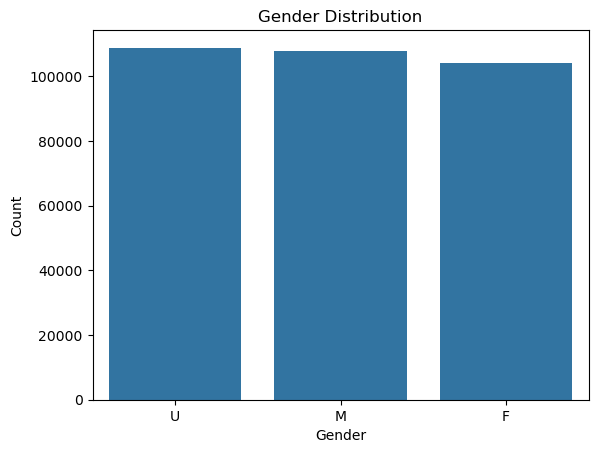

In [279]:
# Gender distribution
sns.countplot(x='gendr', data=df_final_filtered)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [280]:
df_final_filtered['Variation'].unique()

array(['Test', 'Control'], dtype=object)

In [281]:
df_final_filtered['process_step'].value_counts()

process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64

C:\Users\eslab\AppData\Local\Temp\ipykernel_4744\2658395255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_filtered, x='process_step', palette="Set3");


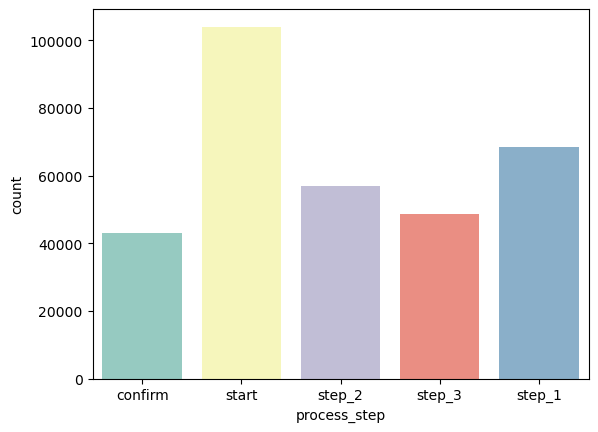

In [282]:
# Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
sns.countplot(data=df_final_filtered, x='process_step', palette="Set3");

C:\Users\eslab\AppData\Local\Temp\ipykernel_4744\1339763098.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_filtered, x='Variation', palette="Set3");


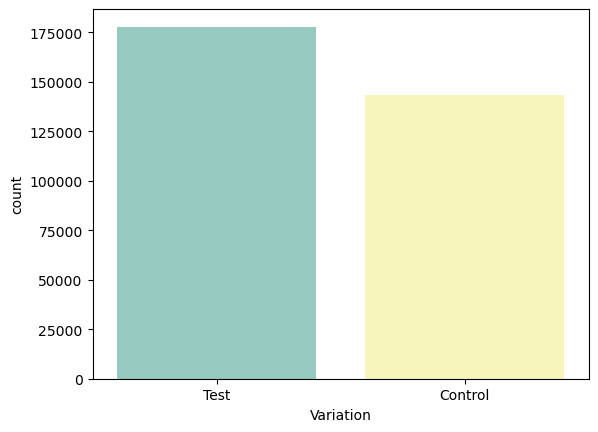

In [283]:
sns.countplot(data=df_final_filtered, x='Variation', palette="Set3");

## Numerical Variables


In [284]:
df_final_filtered.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,3.211950e+05,321195.000000,321195.000000,321195.000000,321195.000000,3.211950e+05,321195.000000,321195.000000
mean,5.009766e+06,12.176528,152.134818,48.553511,2.262962,1.622142e+05,3.236834,6.275082
std,2.872653e+06,6.963181,83.210462,15.645588,0.541536,3.494776e+05,2.193690,2.179757
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.514553e+06,6.000000,82.000000,34.500000,2.000000,4.105887e+04,1.000000,4.000000
50%,5.051667e+06,11.000000,138.000000,50.000000,2.000000,6.924195e+04,3.000000,6.000000
75%,7.468390e+06,16.000000,193.000000,61.000000,2.000000,1.514930e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [285]:
mean_month = df_final_filtered['clnt_tenure_mnth'].mean()
median_month = df_final_filtered['clnt_tenure_mnth'].median()
mode_month = df_final_filtered['clnt_tenure_mnth'].mode()[0]

mean_month, median_month, mode_month

(152.13481841249086, 138.0, 58.0)

In [286]:
# Measures of dispersion
variance_month = df_final_filtered['clnt_tenure_mnth'].var()
std_dev_month = df_final_filtered['clnt_tenure_mnth'].std()
min_month = df_final_filtered['clnt_tenure_mnth'].min()
max_month = df_final_filtered['clnt_tenure_mnth'].max()
range_month = max_month - min_month
quartiles_month = df_final_filtered['clnt_tenure_mnth'].quantile([0.25, 0.5, 0.75])

variance_month, std_dev_month, min_month, max_month, range_month, quartiles_month



(6923.981005119887,
 83.21046211336581,
 33.0,
 669.0,
 636.0,
 0.25     82.0
 0.50    138.0
 0.75    193.0
 Name: clnt_tenure_mnth, dtype: float64)

In [287]:
# Calculating skewness and kurtosis
skewness_month = df_final_filtered['clnt_tenure_mnth'].skew()
kurtosis_month = df_final_filtered['clnt_tenure_mnth'].kurtosis()

skewness_month, kurtosis_month

(1.0149608889921815, 0.8900514168971156)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

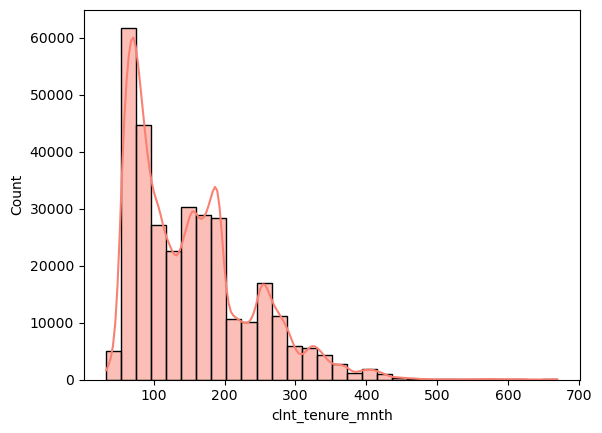

In [288]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['clnt_tenure_mnth'], kde=True, bins=30, color="salmon")

In [289]:
mean_age = df_final_filtered['clnt_age'].mean()
median_age = df_final_filtered['clnt_age'].median()
mode_age = df_final_filtered['clnt_age'].mode()[0]

mean_age, median_age, mode_age

(48.553511106959945, 50.0, 58.5)

In [290]:
variance_age = df_final_filtered['clnt_age'].var()
std_dev_age = df_final_filtered['clnt_age'].std()
min_age = df_final_filtered['clnt_age'].min()
max_age = df_final_filtered['clnt_age'].max()
range_age = max_age - min_age
quartiles_age = df_final_filtered['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age, std_dev_age, min_age, max_age, range_age, quartiles_age

(244.78442943468343,
 15.64558817797156,
 17.0,
 96.0,
 79.0,
 0.25    34.5
 0.50    50.0
 0.75    61.0
 Name: clnt_age, dtype: float64)

In [291]:
skewness_age = df_final_filtered['clnt_age'].skew()
kurtosis_age = df_final_filtered['clnt_age'].kurtosis()

skewness_age, kurtosis_age

(-0.012801806342837261, -0.9346229222661635)

<Axes: xlabel='clnt_age', ylabel='Count'>

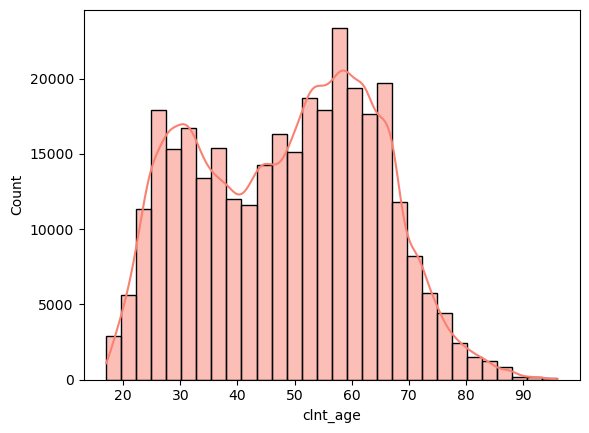

In [292]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['clnt_age'], kde=True, bins=30, color="salmon")

In [293]:
mean_logons_6_mnth = df_final_filtered['logons_6_mnth'].mean()
median_logons_6_mnth = df_final_filtered['logons_6_mnth'].median()
mode_logons_6_mnth = df_final_filtered['logons_6_mnth'].mode()[0]

mean_logons_6_mnth, median_logons_6_mnth, mode_logons_6_mnth

(6.2750821152259535, 6.0, 9)

In [294]:
variance_logons_6_mnth = df_final_filtered['logons_6_mnth'].var()
std_dev_logons_6_mnth = df_final_filtered['logons_6_mnth'].std()
min_logons_6_mnth = df_final_filtered['logons_6_mnth'].min()
max_logons_6_mnth = df_final_filtered['logons_6_mnth'].max()
range_logons_6_mnth = max_logons_6_mnth - min_logons_6_mnth
quartiles_logons_6_mnth = df_final_filtered['logons_6_mnth'].quantile([0.25, 0.5, 0.75])

variance_logons_6_mnth, std_dev_logons_6_mnth, min_logons_6_mnth, max_logons_6_mnth, range_logons_6_mnth, quartiles_logons_6_mnth

(4.751340684158165,
 2.179757024110294,
 3,
 9,
 6,
 0.25    4.0
 0.50    6.0
 0.75    9.0
 Name: logons_6_mnth, dtype: float64)

In [295]:
skewness_logons_6_mnth = df_final_filtered['logons_6_mnth'].skew()
kurtosis_logons_6_mnth = df_final_filtered['logons_6_mnth'].kurtosis()

skewness_logons_6_mnth, kurtosis_logons_6_mnth

(-0.06516227623765022, -1.4394495068728925)

In [296]:
df_final_filtered.clnt_age.value_counts()

clnt_age
58.5    4630
62.5    4563
59.5    4546
57.5    4422
52.5    4362
        ... 
17.0      19
89.5      17
96.0      10
95.5       6
94.5       5
Name: count, Length: 158, dtype: int64

In [297]:
# Define bins and labels for 4 categories
bins = [0, 30, 40, 50, df_final_filtered['clnt_age'].max()]  # Add another bin for 30-40 age group
labels = ['Young (0-30)', 'Young Adults (31-40)', 'Middle-aged (41-50)', 'Senior (51+)']

# Discretize 'clnt_age' into 4 categories
df_final_filtered['clnt_age_category'] = pd.cut(df_final_filtered['clnt_age'], bins=bins, labels=labels, include_lowest=True)

# Display value counts to check the distribution of clients across age categories
df_final_filtered['clnt_age_category'].value_counts()

clnt_age_category
Senior (51+)            159773
Young Adults (31-40)     54840
Middle-aged (41-50)      53516
Young (0-30)             53066
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

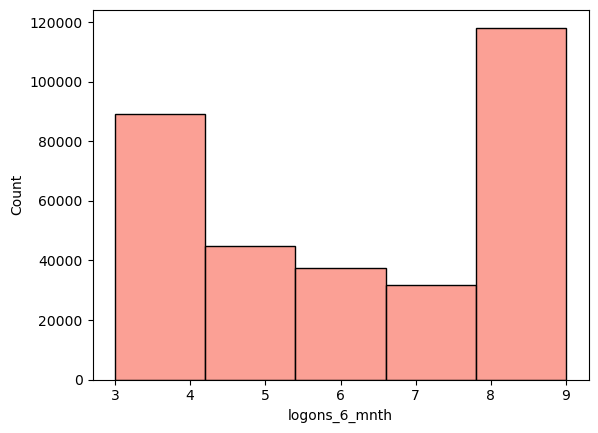

In [298]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_final_filtered['logons_6_mnth'], bins = 5, color="salmon")

In [299]:
df_final_filtered.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+)
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+)
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+)
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+)
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+)


In [300]:
crosstab_age_steps = pd.crosstab(df_final_filtered['clnt_age_category'], df_final_filtered['process_step'])
print(crosstab_age_steps)


process_step          confirm  start  step_1  step_2  step_3
clnt_age_category                                           
Young (0-30)             7357  16566   11377    9626    8140
Young Adults (31-40)     7778  17418   11567    9734    8343
Middle-aged (41-50)      7384  17150   11352    9551    8079
Senior (51+)            20695  52907   34114   27944   24113


In [301]:
chi2, p, dof, expected = chi2_contingency(crosstab_age_steps)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 134.1768809417242, p-value: 8.933267540103155e-23, Degrees of Freedom: 12


p-value = 8.933267540103155e-23 means that there is a statistically significant association between the two categorical variables

In [302]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_age_steps, method="cramer")

0.011800321250993931

<Axes: xlabel='clnt_age_category'>

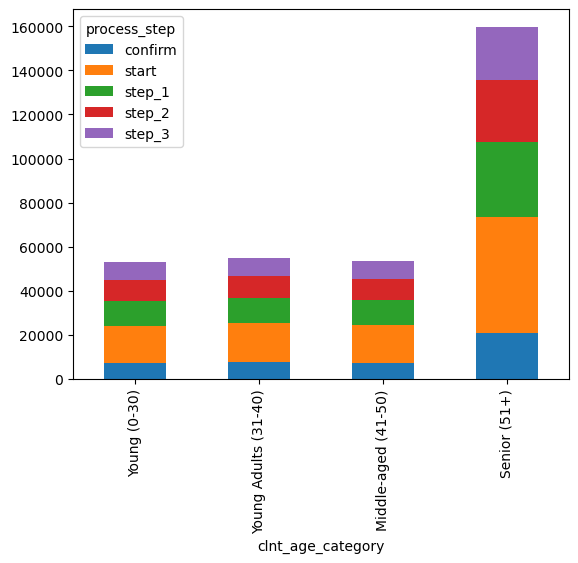

In [306]:
crosstab_age_steps.plot(kind='bar', stacked=True)

The value 0.01 indicates that there is a very weak assosiation

In [303]:
crosstab_gender_steps = pd.crosstab(df_final_filtered['gendr'], df_final_filtered['process_step'])
print(crosstab_gender_steps)

process_step  confirm  start  step_1  step_2  step_3
gendr                                               
F               13721  34410   22341   18195   15623
M               15002  35240   23019   18684   16068
U               14491  34391   23050   19976   16984


In [304]:
chi2, p, dof, expected = chi2_contingency(crosstab_gender_steps)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 121.8623174388735, p-value: 1.367267759634818e-22, Degrees of Freedom: 8


In [305]:
association(crosstab_gender_steps, method="cramer")

0.013773215115891102

<Axes: xlabel='gendr'>

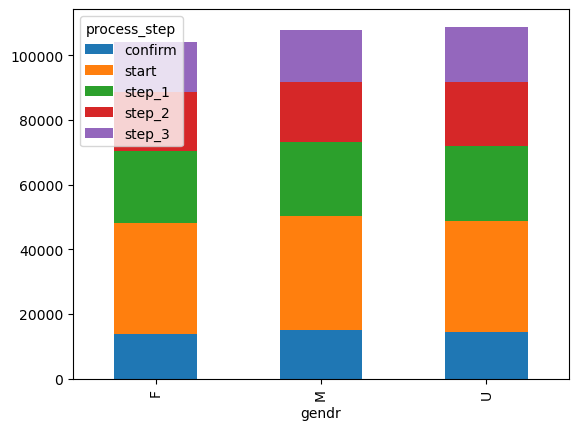

In [307]:
crosstab_gender_steps.plot(kind='bar', stacked=True)

In [309]:
crosstab_age_variations = pd.crosstab(df_final_filtered['clnt_age_category'], df_final_filtered['Variation'])
print(crosstab_age_variations)

Variation             Control   Test
clnt_age_category                   
Young (0-30)            24129  28937
Young Adults (31-40)    24814  30026
Middle-aged (41-50)     24356  29160
Senior (51+)            70109  89664


In [310]:
chi2, p, dof, expected = chi2_contingency(crosstab_age_variations)

print(f'Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')

Chi2: 76.73469173818287, p-value: 1.5390840316683493e-16, Degrees of Freedom: 3


In [ ]:
association